In [1]:
import warnings
warnings.filterwarnings('ignore')

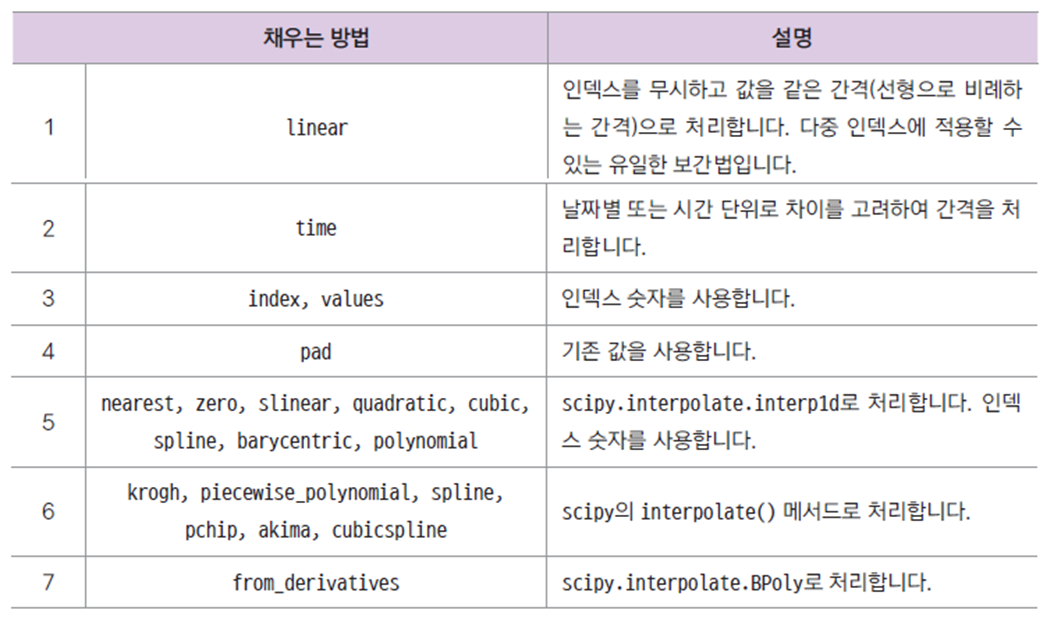

In [3]:
import matplotlib

In [5]:
import matplotlib.font_manager as fm

for i in fm.fontManager.ttflist:
    if i.name.find('Gulim') != -1:
        print(i.name)

New Gulim
Gulim


In [29]:
import matplotlib
print(matplotlib.get_cachedir())


C:\Users\윤선정\.matplotlib


In [39]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [9]:
import numpy as np

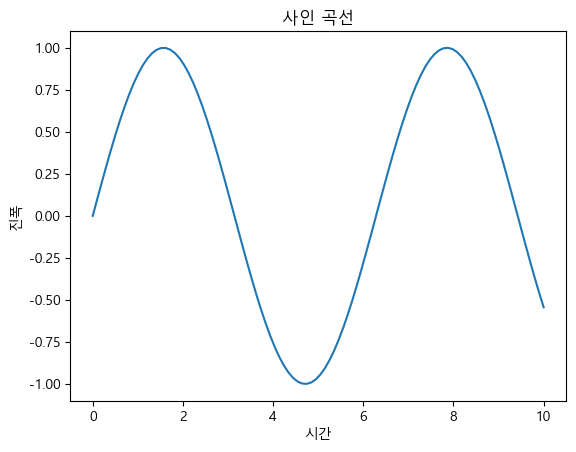

In [41]:
import matplotlib.pyplot as plt

x=np.linspace(0,10, 100)
y=np.sin(x)

plt.plot(x,y)
plt.title('사인 곡선')
plt.xlabel('시간')
plt.ylabel('진폭')
plt.show()

In [43]:
import seaborn as sns
anscombe = sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [47]:
anscombe['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [51]:
d1=anscombe[anscombe['dataset']=='I']
d1.shape

(11, 3)

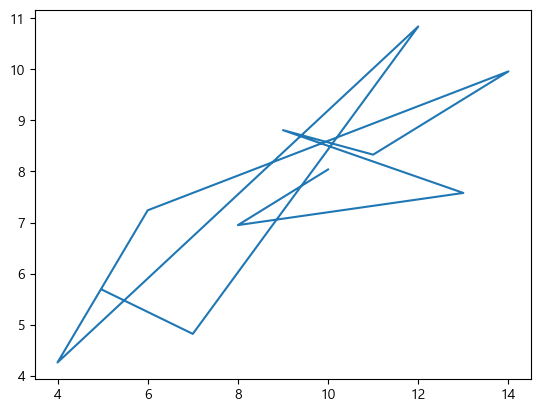

In [53]:
plt.plot(d1['x'],d1['y'])
plt.show()

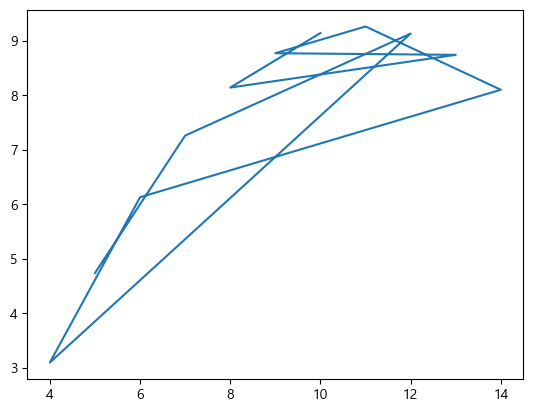

In [55]:
d2=anscombe[anscombe['dataset']=='II']
plt.plot(d2['x'],d2['y'])
plt.show()

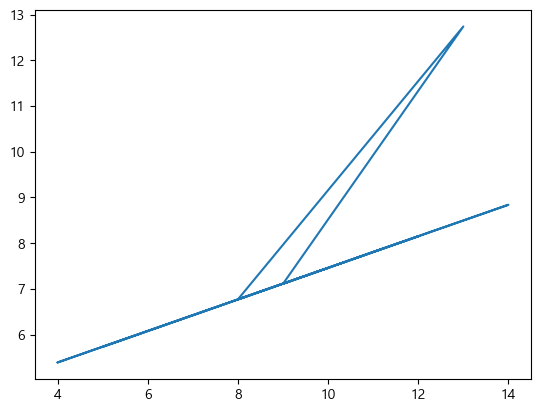

In [57]:
d3=anscombe[anscombe['dataset']=='III']
plt.plot(d3['x'],d3['y'])
plt.show()

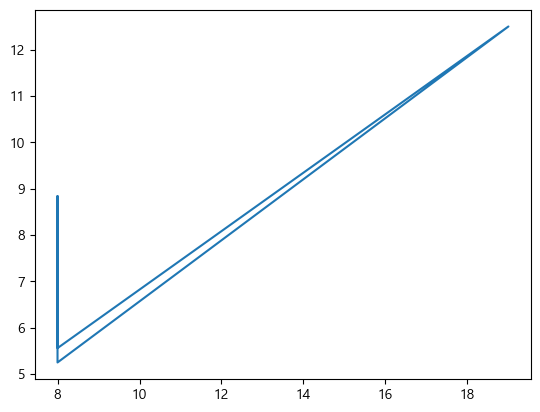

In [59]:
d4=anscombe[anscombe['dataset']=='IV']
plt.plot(d4['x'],d4['y'])
plt.show()

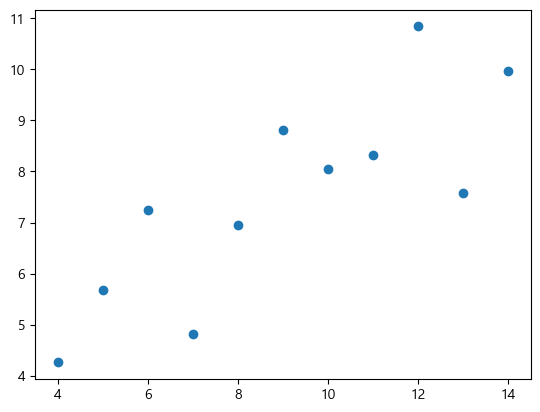

In [69]:
plt.plot(d1['x'],d1['y'],'o')  #산점도
plt.show()

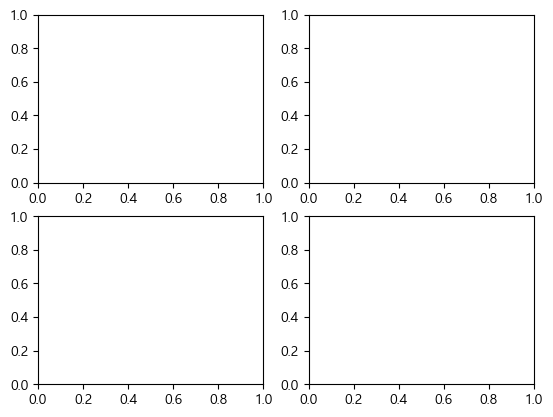

In [67]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)  # 2row 2col, position
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

plt.show()

(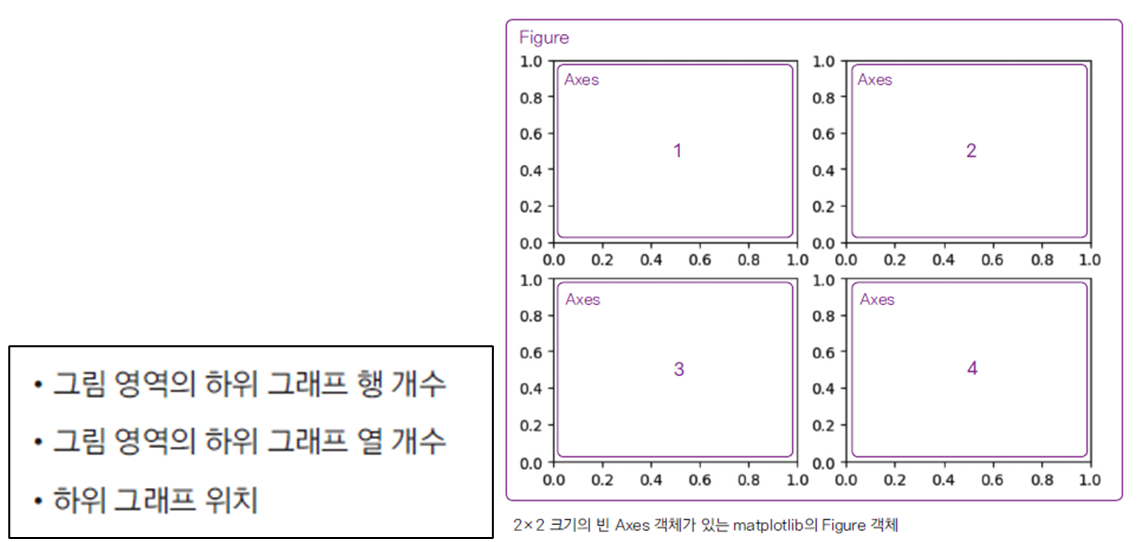)

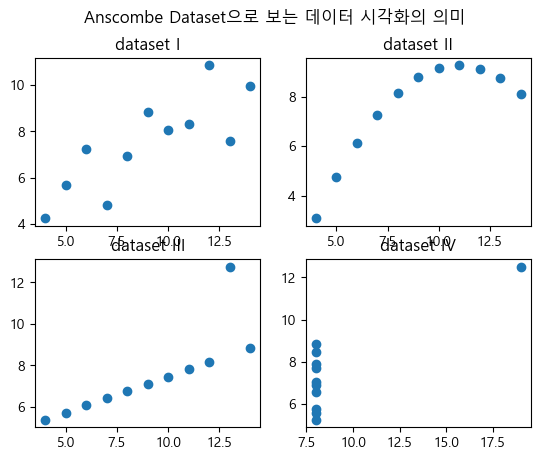

In [78]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)  # 2row 2col, position
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)


axes1.plot(d1['x'],d1['y'],'o')  #산점도
axes2.plot(d2['x'],d2['y'],'o') 
axes3.plot(d3['x'],d3['y'],'o') 
axes4.plot(d4['x'],d4['y'],'o') 

fig.suptitle('Anscombe Dataset으로 보는 데이터 시각화의 의미')
axes1.set_title('dataset I')
axes2.set_title('dataset II')
axes3.set_title('dataset III')
axes4.set_title('dataset IV')

plt.show()

In [ ]:
#새로운 데이터 셋 로드

In [80]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. 일변량 그래프 (변수가 1개)

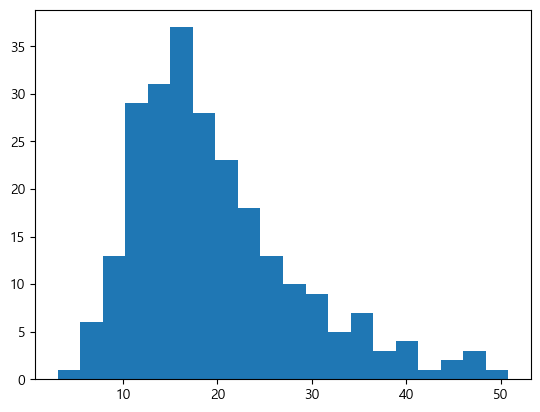

In [87]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.hist(data=tips, x='total_bill',bins=20)
plt.show()

## 2. 이변량

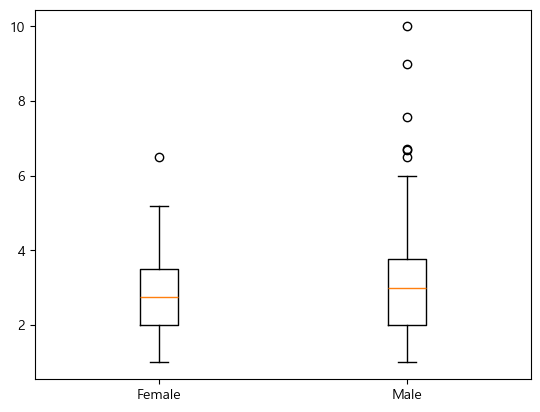

In [91]:
fig= plt.figure()
axes = fig.add_subplot(1,1,1)

axes.boxplot(
    x=[  tips[tips['sex'] == 'Female' ]['tip'],
         tips[tips['sex'] == 'Male'   ]['tip']
      ], 
    labels=['Female','Male']
) 
plt.show()

## 3. 다변량

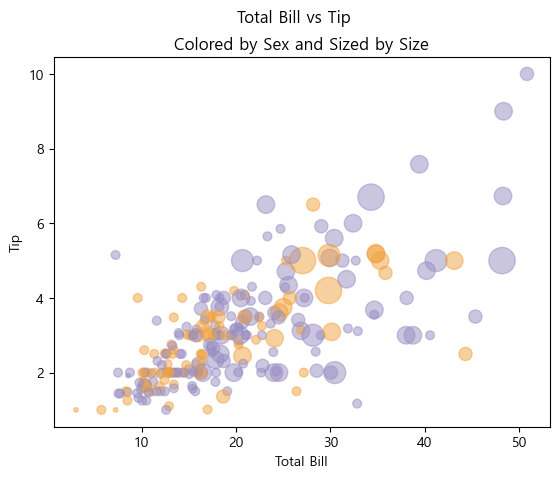

In [95]:
#map()함수에 사용
colors = {"Female": "#f1a340", "Male": "#998ec3"} # 성별에 따른 색상을 지정, 여성은 주황색, 남성은 보라색 
#16진수 코드는 https://www.w3schools.com/colors/colors_picker.asp 에서 확인 가능

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)

axes1.scatter(data=tips,
              x='total_bill',
              y='tip',
              s=tips['size']**2*10,        # size를 제곱하여 점의 크기를 키움, s는 점의 크기를 나타내는 매개변수
              c=tips['sex'].map(colors),   # map()은 Series의 각 요소에 대해 특정 함수를 적용할 때 사용, c는 점의 색을 나타내는 매개변수, 
                                           # colors 딕셔너리에 따라 여성은 주황색, 남성은 보라색
              alpha=0.5) # alpha는 점의 투명도를 나타내는 매개변수

axes1.set_title('Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

scatter_plot.suptitle('Total Bill vs Tip')

plt.show()

# 3. Seaborn 라이브러리

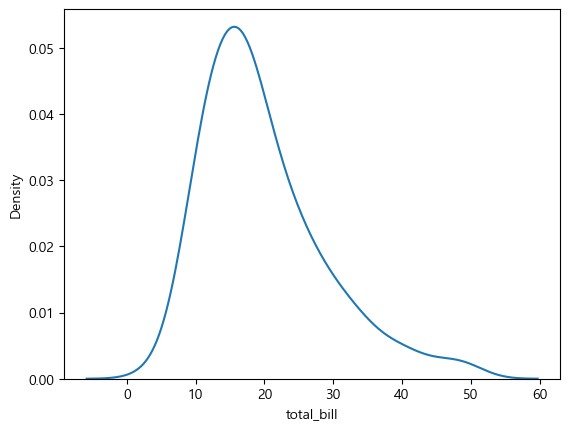

In [104]:
sns.kdeplot(data=tips, x='total_bill')
plt.show()

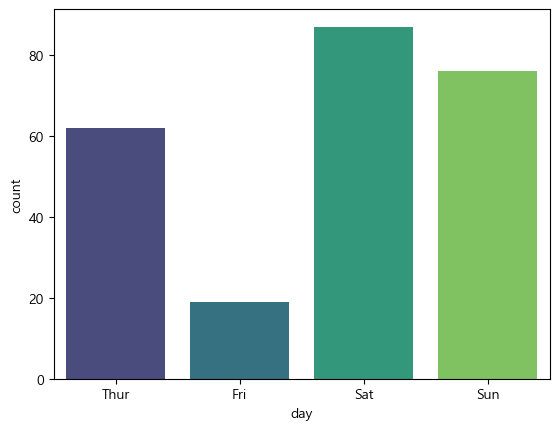

In [106]:
sns.countplot(data=tips, x='day', palette='viridis')
plt.show()

https://seaborn.pydata.org/tutorial/color_palettes.html

#### 이변량 그래프

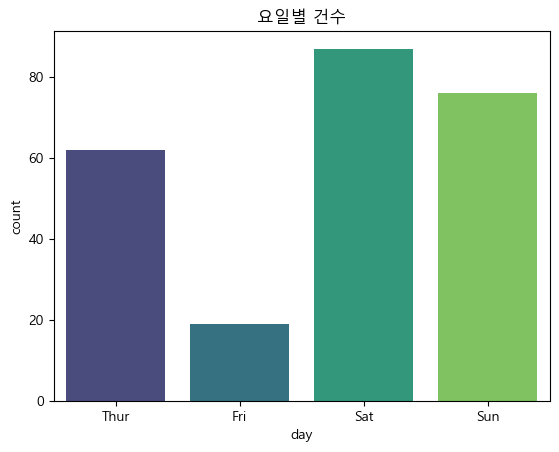

In [110]:
cnt, ax= plt.subplots()
sns.countplot(data=tips, x='day', palette='viridis')
ax.set_title('요일별 건수')
plt.show()

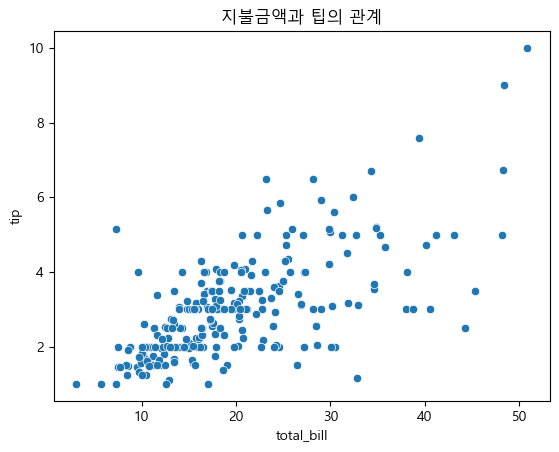

In [114]:
cnt, ax= plt.subplots()
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=ax, palette='viridis')
ax.set_title('지불금액과 팁의 관계')
plt.show()

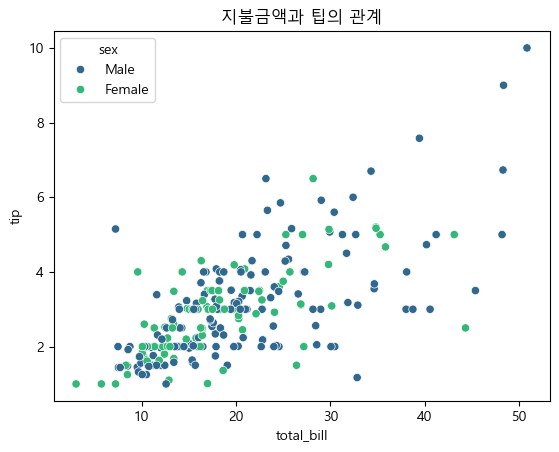

In [117]:
cnt, ax= plt.subplots()
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=ax, hue='sex', palette='viridis')
ax.set_title('지불금액과 팁의 관계')
plt.show()

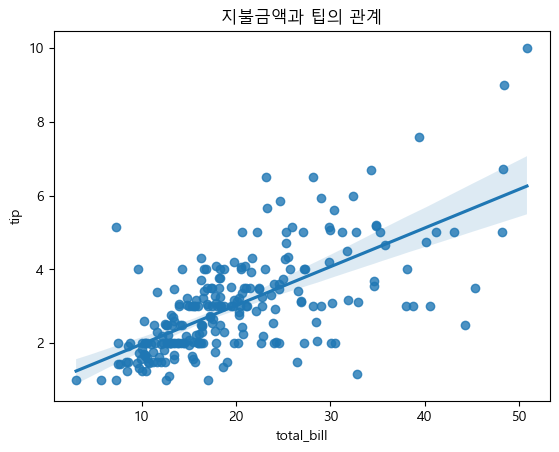

In [121]:
cnt, ax= plt.subplots()
sns.regplot(data=tips, x='total_bill', y='tip', ax=ax)
ax.set_title('지불금액과 팁의 관계')
plt.show()

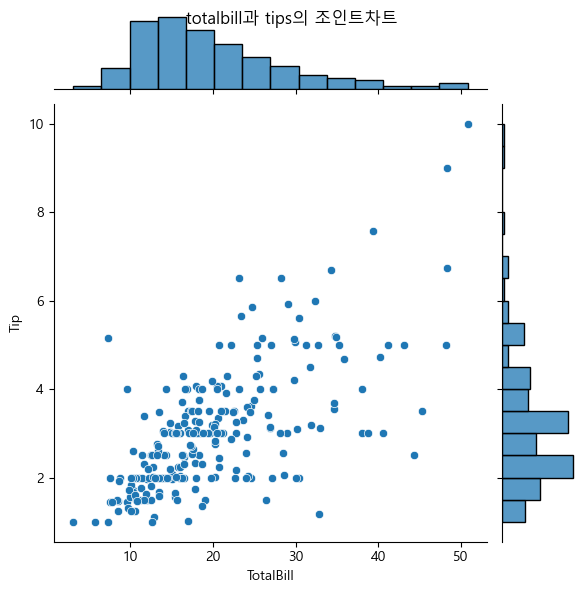

In [123]:
joint = sns.jointplot(data=tips, x='total_bill', y= 'tip')
joint.set_axis_labels(xlabel='TotalBill', ylabel='Tip')
joint.figure.suptitle('totalbill과 tips의 조인트차트')
plt.show()

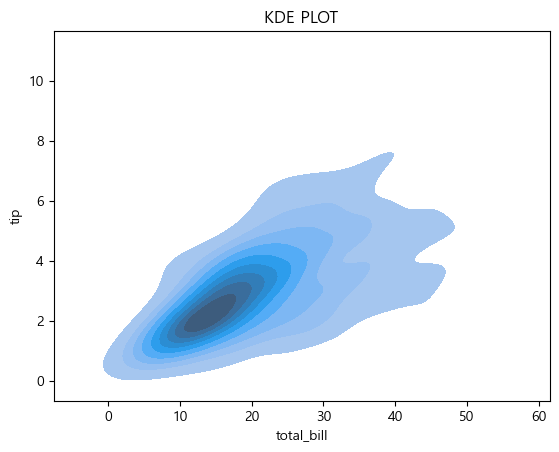

In [126]:
kde, ax = plt.subplots()
sns.kdeplot(data=tips, x='total_bill', y='tip', fill=True, ax=ax)
ax.set_title("KDE PLOT")
plt.show()

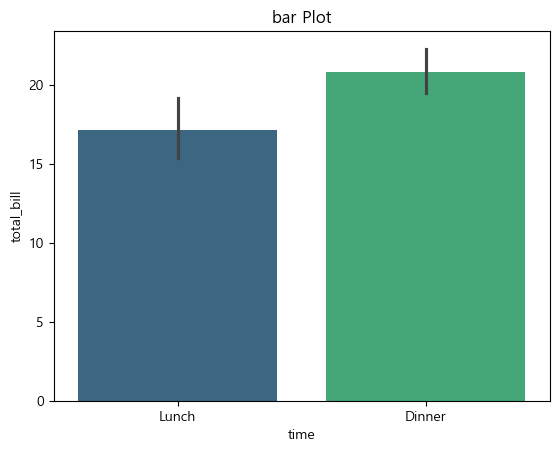

In [138]:
import numpy as np

bar, ax = plt.subplots()
sns.barplot(data=tips, x='time', y='total_bill', estimator=np.mean, ax=ax, palette='viridis')
ax.set_title("bar Plot")
plt.show()

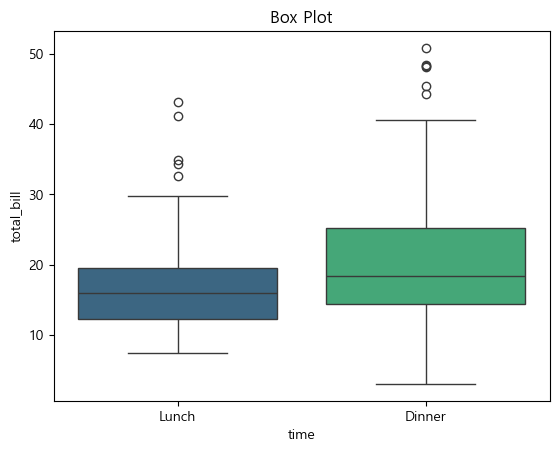

In [140]:
box, ax = plt.subplots()
sns.boxplot(data=tips, x='time', y='total_bill', ax=ax, palette='viridis')
ax.set_title("Box Plot")
plt.show()

#### 다변량 그래프

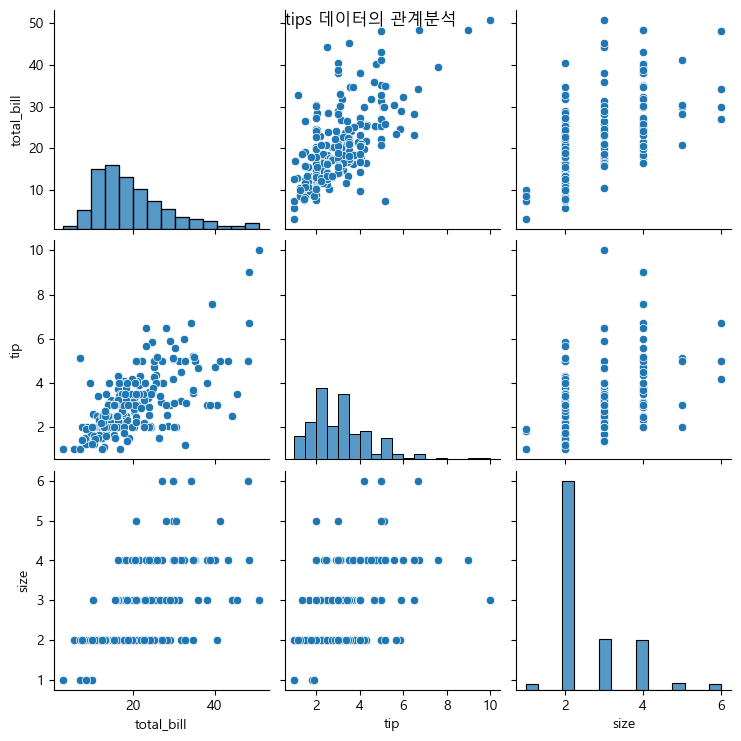

In [142]:
fig=sns.pairplot(data=tips)
fig.figure.suptitle('tips 데이터의 관계분석')
plt.show()